In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

import random
import numpy as np
import pandas as pd

import scipy.stats as stats

In [2]:
df = pd.read_csv('data.csv', parse_dates=['created_date'])

In [3]:
df.head()

,id,grp,cycle_time_days,created_date
0,5052,0,-1,2015-02-05
1,326,0,-1,2013-12-25
2,5056,0,-1,2015-10-16
3,324,0,18,2013-08-13
4,325,0,-1,2013-12-25


In [4]:
cleaned = df[df['created_date'] > '2017-12-31']
cleaned = cleaned[cleaned['cycle_time_days'] > -1]

project_0_cycle_times = cleaned[cleaned['grp'] == 0].cycle_time_days
project_1_cycle_times = cleaned[cleaned['grp'] == 1].cycle_time_days

project_0_cycle_times = project_0_cycle_times.values
project_1_cycle_times = project_1_cycle_times.values

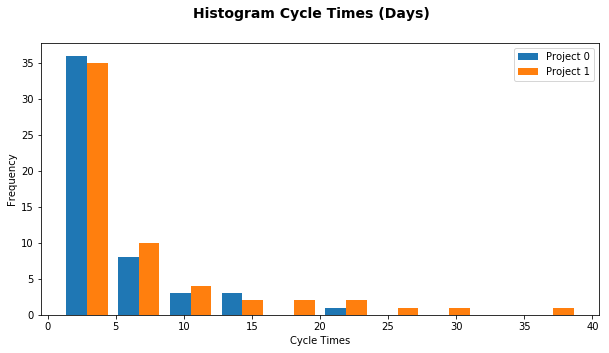

In [5]:
fig, ax = plt.subplots(figsize=(10, 5))
fig.suptitle('Histogram Cycle Times (Days)', fontsize=14, fontweight='bold')
plt.hist([project_0_cycle_times, project_1_cycle_times], label=['Project 0', 'Project 1'])
ax.set_xlabel('Cycle Times')
ax.set_ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

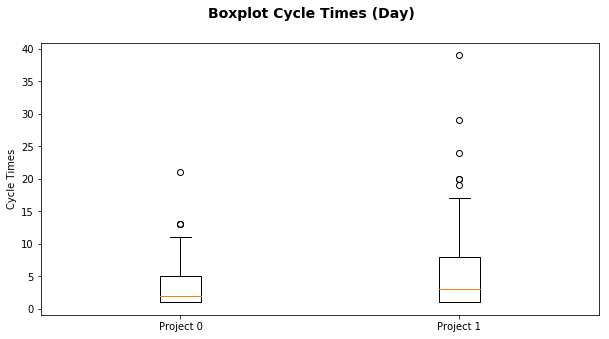

In [6]:
fig, ax = plt.subplots(figsize=(10, 5))
fig.suptitle('Boxplot Cycle Times (Day)', fontsize=14, fontweight='bold')

plt.boxplot([project_0_cycle_times, project_1_cycle_times])

ax.set_xticklabels(['Project 0', 'Project 1'])
ax.set_ylabel('Cycle Times')


plt.show()

In [7]:

print(stats.describe(project_0_cycle_times))
print(stats.describe(project_1_cycle_times))

DescribeResult(nobs=51, minmax=(1, 21), mean=3.7058823529411766, variance=17.93176470588235, skewness=2.0789642149745884, kurtosis=4.474217402617895)
DescribeResult(nobs=58, minmax=(1, 39), mean=6.327586206896552, variance=61.2416817906836, skewness=2.146885333051502, kurtosis=4.8044881900831315)


In [8]:

total_work_items = 1000

def cumulative_sum(total_work_items, cycle_times, selector):
    total = [0]
    for i, e in enumerate(range(total_work_items)):
            total.append(selector(cycle_times) + total[i])
    return total

In [9]:
cumulative_sum_min = cumulative_sum(total_work_items, project_0_cycle_times, min)
cumulative_sum_max = cumulative_sum(total_work_items, project_0_cycle_times, max)
cumulative_random = cumulative_sum(total_work_items, project_0_cycle_times, random.choice)

In [10]:
range_work_items = [x for x in range(total_work_items + 1)]

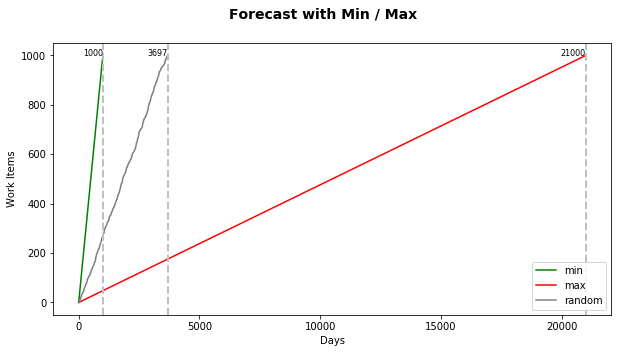

In [11]:
fig, ax = plt.subplots(figsize=(10, 5))


fig.suptitle('Forecast with Min / Max', fontsize=14, fontweight='bold')

plt.plot(cumulative_sum_min, range_work_items, label='min',  color='green')
plt.plot(cumulative_sum_max, range_work_items, label='max', color='red')
plt.plot(cumulative_random, range_work_items, label='random', color='gray')

value_max = cumulative_sum_max[-1]
value_min = cumulative_sum_min[-1]
value_random =  cumulative_random[-1]

plt.axvline(value_max, color='silver', linestyle='dashed', linewidth=2)
plt.axvline(value_min, color='silver', linestyle='dashed', linewidth=2)
plt.axvline(value_random, color='silver', linestyle='dashed', linewidth=2)

t = ax.text(value_max, total_work_items, value_max, ha="right", size=8)
t = ax.text(value_min, total_work_items, value_min, ha="right", size=8)
t = ax.text(value_random, total_work_items, value_random, ha="right", size=8)

ax.set_xlabel("Days")
ax.set_ylabel("Work Items")

plt.legend(loc='lower right')


plt.show()

In [12]:
num_of_iterations = 5000

def simulate(num_of_iterations, total_work_items, cycle_times):
    list_random_walks = []
    totals = []
    
    for i in range(num_of_iterations):
        list_random_walks.append(
            cumulative_sum(total_work_items, cycle_times, random.choice))
    
    for i in list_random_walks:
        totals.append(i[-1])
    
    return totals, list_random_walks

simulated_total, simulated_work_done = simulate(num_of_iterations, total_work_items, project_0_cycle_times)

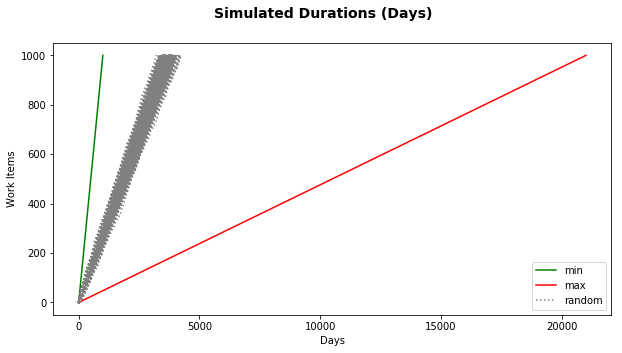

In [13]:

fig, ax = plt.subplots(figsize=(10, 5))

fig.suptitle('Simulated Durations (Days)', fontsize=14, fontweight='bold')

plt.plot(cumulative_sum_min, range_work_items, label='min',  color='green')
plt.plot(cumulative_sum_max, range_work_items, label='max', color='red')
plt.plot(0, 0, linestyle='dotted', color='gray', label='random')


for r in simulated_work_done:
    plt.plot(r, range_work_items, linestyle='dotted', color='gray')

#plt.axvline(50, color='silver', linestyle='dashed', linewidth=2)
#plt.axvline(100, color='silver', linestyle='dashed', linewidth=2)
#plt.axvline(150, color='silver', linestyle='dashed', linewidth=2)

ax.set_xlabel("Days")
ax.set_ylabel("Work Items")

plt.legend(loc='lower right')
plt.show()

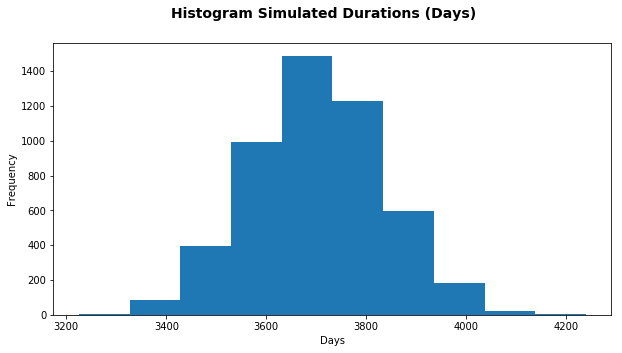

In [14]:
fig, ax = plt.subplots(figsize=(10, 5))
fig.suptitle('Histogram Simulated Durations (Days)', fontsize=14, fontweight='bold')
ax.set_xlabel('Days')
ax.set_ylabel('Frequency')
plt.hist(simulated_total)


In [15]:
q = [50, 85, 90, 95, 99]
p = np.percentile(simulated_total, q)
print(p)

[3702. 3840. 3871. 3922. 4012.]


C:\Users\Harish\Anaconda3\envs\DataScience\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Users\Harish\Anaconda3\envs\DataScience\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  


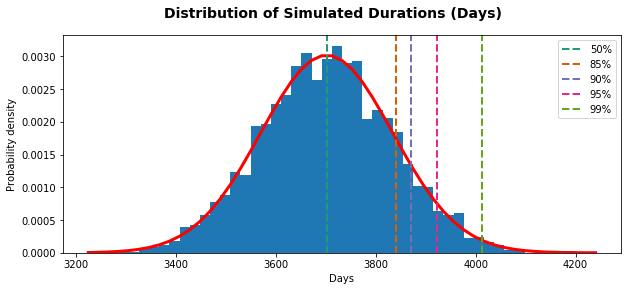

In [16]:
fig, ax = plt.subplots(figsize=(10, 4))

fig.suptitle('Distribution of Simulated Durations (Days)', fontsize=14, fontweight='bold')

num_bins = 50

mu = np.median(simulated_total)
sigma = np.std(simulated_total)

# the histogram of the data
n, bins, patches = ax.hist(simulated_total, num_bins, normed=1)

# add a 'best fit' line
y = mlab.normpdf(bins, mu, sigma)
ax.plot(bins, y, color='red', linestyle='solid', linewidth=3)
ax.set_xlabel('Days')
ax.set_ylabel('Probability density')

cm = plt.cm.get_cmap('Dark2')


for i, v in enumerate(p):
    plt.axvline(v, color=cm.colors[i], linestyle='dashed', linewidth=2, label=str(q[i]) + '%')

plt.legend(loc='upper right')
plt.show()

# How many work items might be finished in 2000 days?

In [17]:
def get_percentile_sum(simulated_work_done, p):
    t = np.transpose(simulated_work_done)
    percentile_sum = []
    
    for i, d in enumerate(t):
        if i == 0:
            percentile_sum.append(int(np.percentile(d, p)))
        else:
            percentile_sum.append(int(np.percentile(d, p)))
            
    return percentile_sum

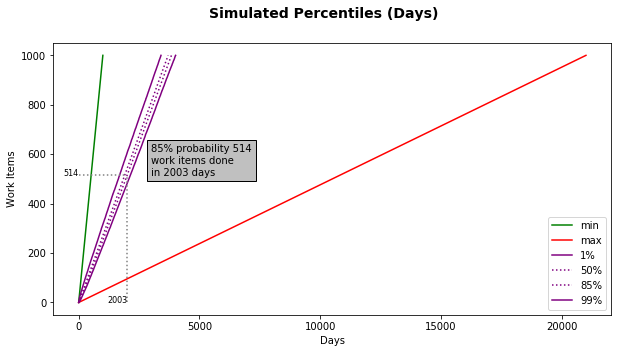

In [18]:
def get_next_best_work_items(days, p):


    percentile_days = get_percentile_sum(simulated_work_done, p)

    for i in range(len(percentile_days)):
        if percentile_days[i] >= days:
            y = i
            break

    return percentile_days[y], y

p = 85
days = 2000

x, y = get_next_best_work_items(days, p)



fig, ax = plt.subplots(figsize=(10, 5))

fig.suptitle('Simulated Percentiles (Days)', fontsize=14, fontweight='bold')

plt.plot(cumulative_sum_min, range_work_items, label='min',  color='green')
plt.plot(cumulative_sum_max, range_work_items, label='max', color='red')
plt.plot(get_percentile_sum(simulated_work_done, 1), range_work_items, label='1%',  color='purple')
plt.plot(get_percentile_sum(simulated_work_done, 50), range_work_items, label='50%',  color='purple', linestyle='dotted')
plt.plot(get_percentile_sum(simulated_work_done, 85), range_work_items, label='85%',  color='purple', linestyle='dotted')
plt.plot(get_percentile_sum(simulated_work_done, 99), range_work_items, label='99%',  color='purple')



plt.plot([x, x], [0, y],  color='gray', linestyle='dotted')
plt.plot([0, x], [y, y],  color='gray', linestyle='dotted')
ax.text(3000, y, str(p) + '% probability ' + str(y) +  '\nwork items done\nin ' + str(x) + ' days', withdash=True, bbox=dict(facecolor='silver'))

ax.text(x,0, x, ha="right", size=8)
ax.text(0,y, y, ha="right", size=8)


ax.set_xlabel("Days")
ax.set_ylabel("Work Items")

plt.legend(loc='lower right')
plt.show()

In [19]:
def predict_work_items_p85(x):
    return 514/2004 * x

In [20]:
predict_work_items_p85(2000)

512.9740518962076

In [21]:
percentile_days = get_percentile_sum(simulated_work_done, 85)

In [22]:
percentile_days


[0,
 6,
 14,
 19,
 24,
 28,
 33,
 37,
 42,
 47,
 51,
 55,
 60,
 64,
 68,
 73,
 77,
 81,
 85,
 90,
 94,
 99,
 102,
 106,
 110,
 115,
 119,
 123,
 127,
 132,
 136,
 139,
 144,
 148,
 152,
 156,
 160,
 164,
 168,
 172,
 176,
 180,
 185,
 188,
 192,
 196,
 200,
 204,
 208,
 213,
 217,
 221,
 225,
 229,
 233,
 237,
 241,
 244,
 249,
 253,
 257,
 261,
 265,
 270,
 274,
 277,
 281,
 285,
 289,
 292,
 296,
 301,
 305,
 309,
 313,
 317,
 321,
 325,
 328,
 333,
 336,
 341,
 344,
 348,
 353,
 356,
 361,
 364,
 368,
 372,
 376,
 380,
 384,
 388,
 392,
 396,
 399,
 404,
 407,
 411,
 415,
 418,
 422,
 426,
 430,
 434,
 438,
 442,
 446,
 449,
 454,
 458,
 461,
 465,
 469,
 473,
 477,
 481,
 484,
 489,
 492,
 497,
 500,
 505,
 508,
 512,
 516,
 520,
 523,
 528,
 531,
 535,
 539,
 543,
 547,
 551,
 555,
 559,
 563,
 568,
 572,
 576,
 580,
 584,
 586,
 591,
 594,
 598,
 601,
 605,
 610,
 614,
 617,
 621,
 625,
 629,
 633,
 637,
 641,
 645,
 649,
 653,
 656,
 660,
 664,
 668,
 673,
 677,
 680,
 684,
 687

# Trial 2

In [1]:
import random

def getCoinProb(headsProb, numFlips):
    prob = 0.0
    for flip in range(numFlips):
        currentFlip = random.random()
        if currentFlip <= headsProb: #Probability of Heads
            prob += 1
    return prob / numFlips

In [8]:
getCoinProb(.5, 2)

0.5

In [12]:
def rollDice():
    return random.choice([1,2,3,4,5,6])

def Monteprob(numTrials): 
    numwins = 0.0 
    for i in range(numTrials): 
        for j in range(24): 
            d1 = rollDice() 
            d2 = rollDice() 
            if d1 == 6 and d2 == 6: 
                numwins += 1 
                break 
    print(numwins/numTrials )
    

In [13]:
Monteprob(100)

0.54
